# Multi layer artificial neural network for hand written digit recognition

### This coce was modified from [Building a simple neural-network with Keras](https://github.com/wxs/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils


Using TensorFlow backend.


### Load the dataset

In [2]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


### Check a few samples from the data

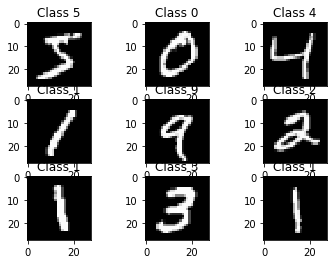

In [3]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [12]:
y_train.shape

(60000,)

In [13]:
y_test.shape

(10000,)

### Format the data

In [5]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)
Y_train = np_utils.to_categorical(y_train, nb_classes) #binarize into 9 class
Y_test = np_utils.to_categorical(y_test, nb_classes)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [6]:
Y_train[0] # which represents 5 i.e. the first image

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Build the neural network

In [7]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

W1204 11:05:26.775215 4554913216 deprecation_wrapper.py:119] From /Users/pawansapkota/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1204 11:05:26.824176 4554913216 deprecation_wrapper.py:119] From /Users/pawansapkota/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1204 11:05:26.827080 4554913216 deprecation_wrapper.py:119] From /Users/pawansapkota/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1204 11:05:26.855161 4554913216 deprecation_wrapper.py:119] From /Users/pawansapkota/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.p

### Compile the model

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

W1204 11:05:26.935077 4554913216 deprecation_wrapper.py:119] From /Users/pawansapkota/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1204 11:05:26.958514 4554913216 deprecation_wrapper.py:119] From /Users/pawansapkota/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



### Train the model

In [9]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
model.fit(X_train, Y_train,
          batch_size=128, nb_epoch=4,
          verbose=1, validation_data=(X_test, Y_test))

/Users/pawansapkota/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """
W1204 11:05:27.189507 4554913216 deprecation.py:323] From /Users/pawansapkota/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 19s 312us/step - loss: 0.2499 - val_loss: 0.0957
Epoch 2/4
60000/60000 [==============================] - 16s 265us/step - loss: 0.1000 - val_loss: 0.0842
Epoch 3/4
60000/60000 [==============================] - 16s 268us/step - loss: 0.0697 - val_loss: 0.0758
Epoch 4/4
60000/60000 [==============================] - 17s 283us/step - loss: 0.0534 - val_loss: 0.0617


### Performance evaluation

In [10]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

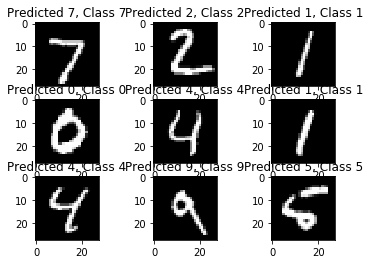

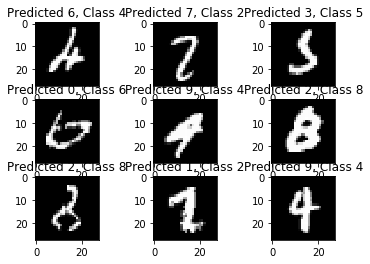

In [11]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
